# Assignment 6.2 Exploring Relationships

## This script contains the following:
## 1. Importing Visualization Libraries and Data
## 2. Data Cleaning
## 3. Exploring Relationships
    Correlations
    Scatterplots
    Pair Plots
    Categorical Plots

### 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [4]:
# Check matplotlib version
matplotlib.__version__

'3.8.4'

In [5]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [6]:
# Define path

path = r'/Users/allisonweese/Documents/Career Foundry/Achievement 6'

In [19]:
# Import data

drivers = pd.read_csv(os.path.join(path, 'Data After Assignment 6.1', 'driversdata.csv'))

In [25]:
# Import data

teams = pd.read_csv(os.path.join(path, 'Data After Assignment 6.1', 'teamsdata.csv'))

In [26]:
# Import Data

winners = pd.read_csv(os.path.join(path, 'Data After Assignment 6.1', 'winnersdata.csv'))

In [27]:
# Import Data

laps = pd.read_csv(os.path.join(path, 'Data After Assignment 6.1', 'lapsdata.csv'))

### 2. Cleaning Data

In [29]:
# Checking Data Types

drivers.dtypes

Pos            float64
Driver          object
Nationality     object
Car             object
PTS            float64
year             int64
Code            object
dtype: object

In [30]:
# Checking data types

teams.dtypes

Unnamed: 0      int64
Pos           float64
Team           object
PTS           float64
year            int64
dtype: object

In [31]:
# Checking Data types

winners.dtypes

Unnamed: 0     int64
Grand Prix    object
Date          object
Winner        object
Car           object
Laps           int64
Time          object
Name Code     object
dtype: object

In [32]:
# Checking data types

laps.dtypes

Unnamed: 0     int64
Grand Prix    object
Driver        object
Car           object
Time          object
year           int64
Code          object
dtype: object

In [36]:
# Iterate through each column in the DataFrame
for col in drivers.columns.tolist():
    # Check if there are mixed data types within the column using map instead of applymap
    weird = (drivers[[col]].map(type) != drivers[[col]].iloc[0].map(type)).any(axis=1)
    
    # If mixed types are found, print the column name
    if len(drivers[weird]) > 0:
        print(col)

In [37]:
# Iterate through each column in the laps DataFrame
for col in laps.columns.tolist():
    # Check if all data types in the column are the same
    if laps[col].map(type).nunique() > 1:
        print(f"Mixed types found in laps column: {col}")

In [38]:
# Iterate through each column in the winners DataFrame
for col in winners.columns.tolist():
    # Check if all data types in the column are the same
    if winners[col].map(type).nunique() > 1:
        print(f"Mixed types found in winners column: {col}")

In [39]:
# Iterate through each column in the teams DataFrame
for col in teams.columns.tolist():
    # Check if all data types in the column are the same
    if teams[col].map(type).nunique() > 1:
        print(f"Mixed types found in teams column: {col}")

In [40]:
# no mixed data types

In [46]:
# Dropping 'Unnamed' columns for the drivers DataFrame
drivers = drivers.loc[:, ~drivers.columns.str.contains('^Unnamed')]

# Dropping 'Unnamed' columns for the laps DataFrame
laps = laps.loc[:, ~laps.columns.str.contains('^Unnamed')]

# Dropping 'Unnamed' columns for the teams DataFrame
teams = teams.loc[:, ~teams.columns.str.contains('^Unnamed')]

# Dropping 'Unnamed' columns for the winners DataFrame
winners = winners.loc[:, ~winners.columns.str.contains('^Unnamed')]

### 3. Exploring relationships

In [41]:
# Create a correlation matrix using pandas

winners.corr()

ValueError: could not convert string to float: 'Great Britain'

In [47]:
# Select only numeric columns from the winners DataFrame
numeric_winners = winners.select_dtypes(include=[np.number])

# Create a correlation matrix
correlation_matrix = numeric_winners.corr()

# Display the correlation matrix
print(correlation_matrix)

      Laps
Laps   1.0


In [48]:
# Select only numeric columns from the drivers DataFrame
numeric_drivers = drivers.select_dtypes(include=[np.number])

# Create a correlation matrix
correlation_matrix_drivers = numeric_drivers.corr()

# Display the correlation matrix
print("Drivers Correlation Matrix:")
print(correlation_matrix_drivers)

Drivers Correlation Matrix:
           Pos       PTS      year
Pos   1.000000 -0.517262  0.062277
PTS  -0.517262  1.000000  0.390062
year  0.062277  0.390062  1.000000


In [49]:
# Select only numeric columns from the laps DataFrame
numeric_laps = laps.select_dtypes(include=[np.number])

# Create a correlation matrix
correlation_matrix_laps = numeric_laps.corr()

# Display the correlation matrix
print("Laps Correlation Matrix:")
print(correlation_matrix_laps)

Laps Correlation Matrix:
      year
year   1.0


In [50]:
# Select only numeric columns from the teams DataFrame
numeric_teams = teams.select_dtypes(include=[np.number])

# Create a correlation matrix
correlation_matrix_teams = numeric_teams.corr()

# Display the correlation matrix
print("Teams Correlation Matrix:")
print(correlation_matrix_teams)

Teams Correlation Matrix:
           Pos       PTS      year
Pos   1.000000 -0.517095  0.025956
PTS  -0.517095  1.000000  0.425452
year  0.025956  0.425452  1.000000


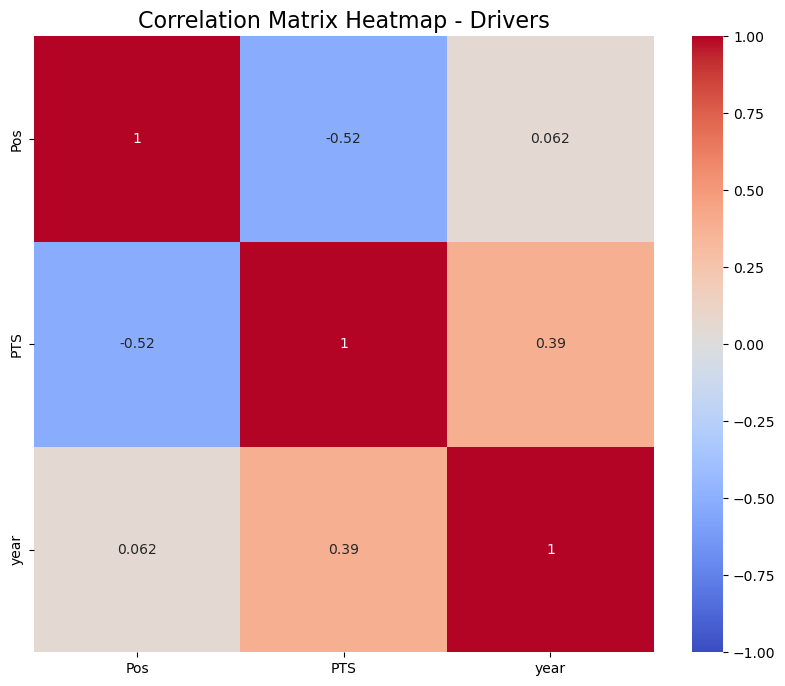

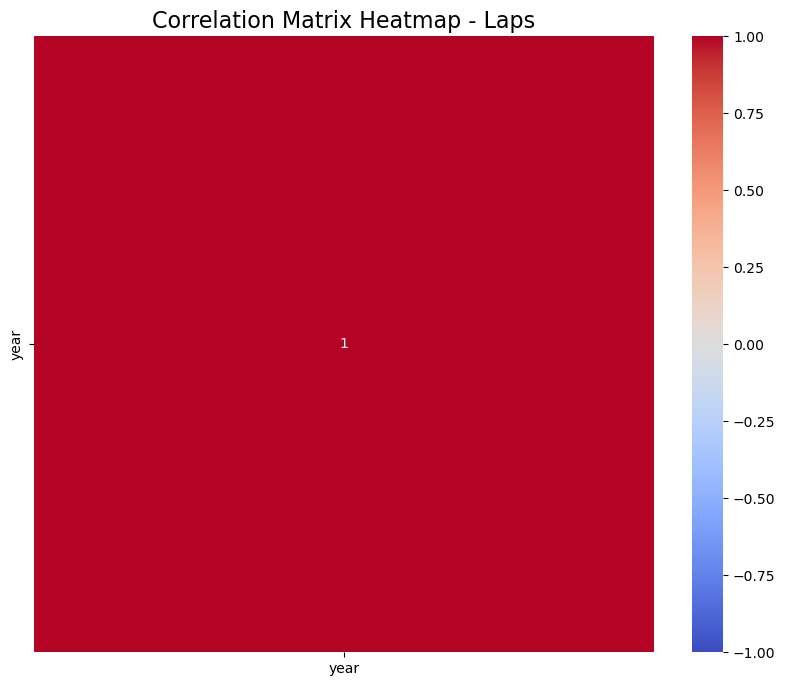

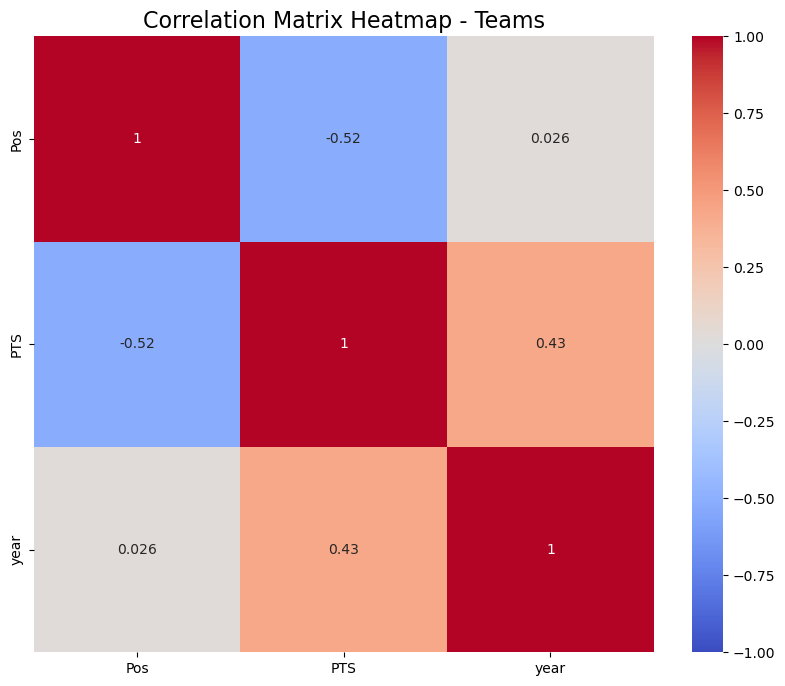

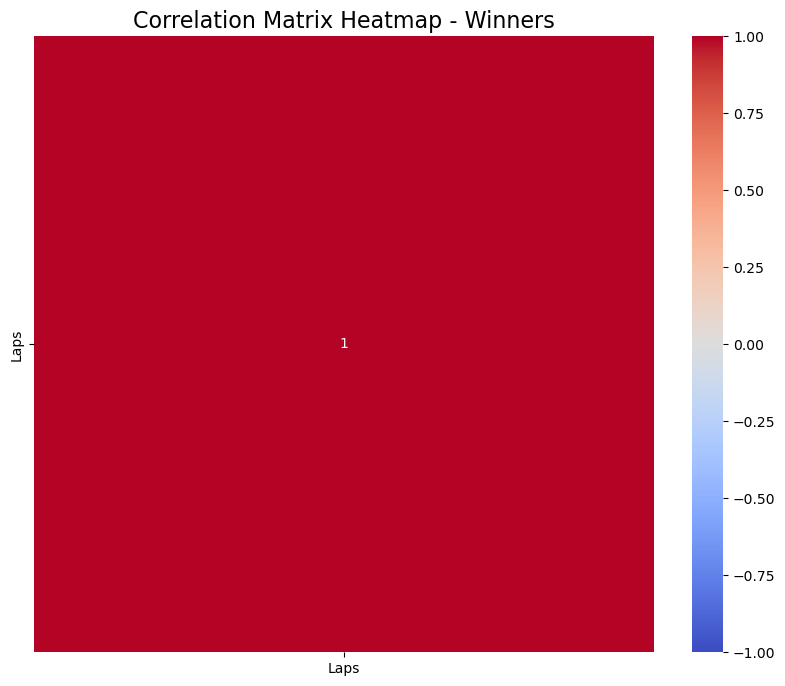

In [51]:
# Function to create a correlation matrix heatmap
def plot_correlation_heatmap(df, title):
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=[np.number])

    # Create the correlation matrix
    correlation_matrix = numeric_df.corr()

    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Correlation Matrix Heatmap - {title}', fontsize=16)
    plt.show()

# Plotting for each DataFrame
plot_correlation_heatmap(drivers, "Drivers")
plot_correlation_heatmap(laps, "Laps")
plot_correlation_heatmap(teams, "Teams")
plot_correlation_heatmap(winners, "Winners")

In [52]:
# The heatmap only works with the teams and drivers data

In [53]:
# Negative Correlation: The moderate negative correlation between Pos and PTS indicates that teams performing worse (higher positions) tend to score fewer points.
# Positive Correlation: The positive correlation between PTS and year might suggest that, over time, teams have generally scored more points, possibly due to changes in the rules or increased competition.
# Weak or No Correlation: The weak correlation between Pos and year shows that a team’s position does not vary systematically with the year.

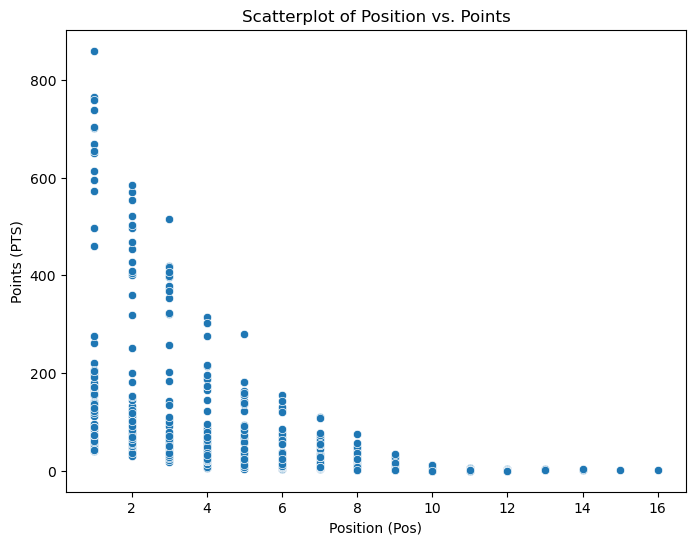

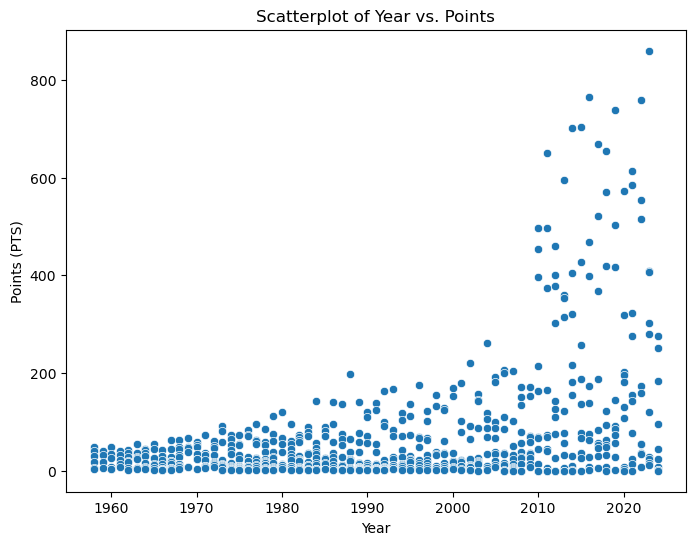

In [54]:
# Scatterplot for the variables with the strongest correlation: Pos vs. PTS
plt.figure(figsize=(8, 6))
sns.scatterplot(x=teams['Pos'], y=teams['PTS'])
plt.title('Scatterplot of Position vs. Points')
plt.xlabel('Position (Pos)')
plt.ylabel('Points (PTS)')
plt.show()

# Scatterplot for the variables with the next strongest correlation: PTS vs. Year
plt.figure(figsize=(8, 6))
sns.scatterplot(x=teams['year'], y=teams['PTS'])
plt.title('Scatterplot of Year vs. Points')
plt.xlabel('Year')
plt.ylabel('Points (PTS)')
plt.show()

In [55]:
# Pos vs. PTS: The scatterplot shows an inverse relationship, where as the position (Pos) increases (indicating worse performance), the points (PTS) decrease. This visual representation confirms the negative correlation observed in the heatmap.

# Year vs. PTS: The scatterplot shows a trend where points (PTS) tend to increase with the year. This suggests that teams may have been scoring more points as time progresses, potentially due to changes in the scoring system or improvements in team performance.

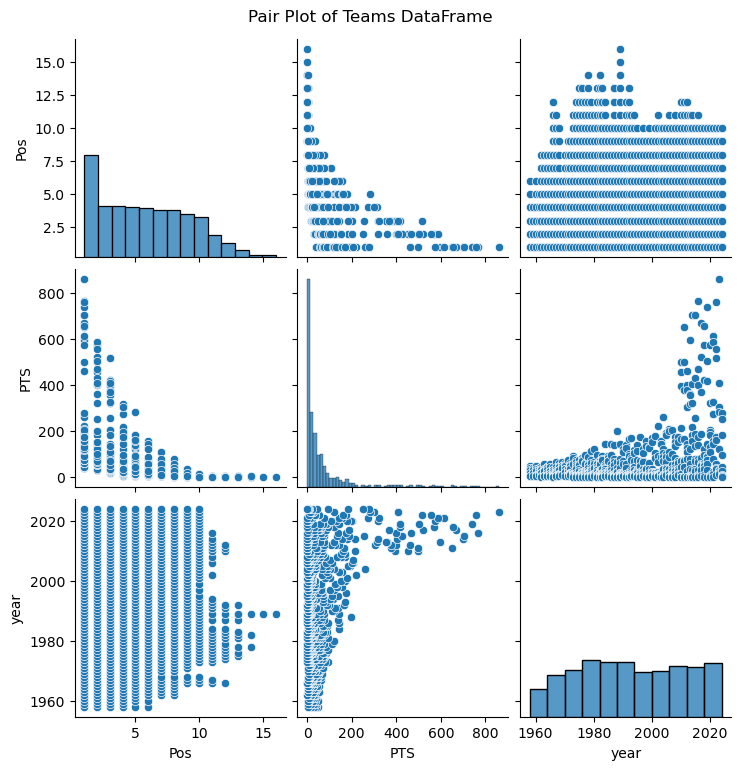

In [56]:
# Filter numeric columns and create a pair plot
sns.pairplot(teams.select_dtypes(include=[np.number]))
plt.suptitle("Pair Plot of Teams DataFrame", y=1.02)
plt.show()

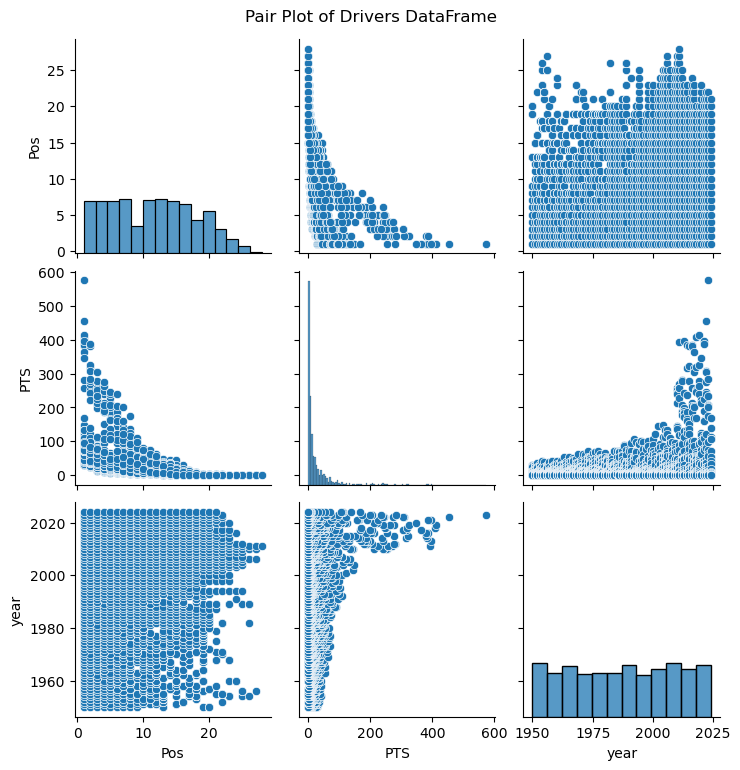

In [57]:
# Filter numeric columns and create a pair plot
sns.pairplot(drivers.select_dtypes(include=[np.number]))
plt.suptitle("Pair Plot of Drivers DataFrame", y=1.02)
plt.show()

In [58]:
# I would like to explore the sharp rise in points in recent years

In [65]:
# create categorical chart showing car manufacturers that score the highest points

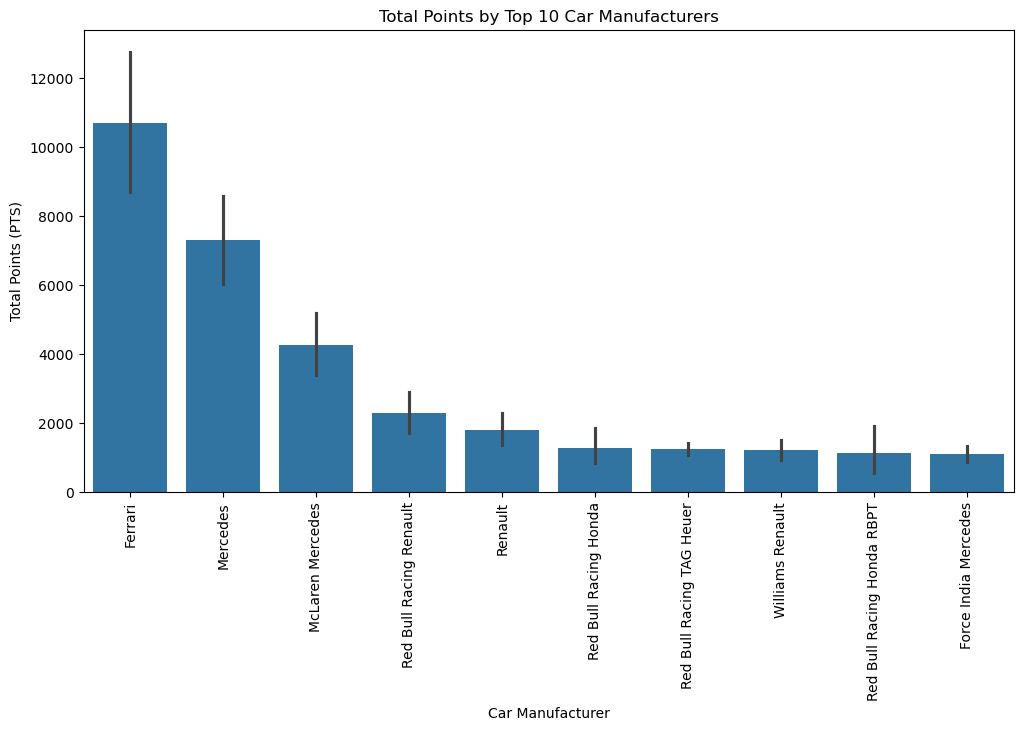

In [62]:
# Group by 'Car' and calculate the total points for each manufacturer
top_cars = drivers.groupby('Car')['PTS'].sum().sort_values(ascending=False).head(10).index

# Filter the dataframe to only include the top 10 car manufacturers
top_drivers = drivers[drivers['Car'].isin(top_cars)]

# Create a bar plot of total points by the top 10 car manufacturers
plt.figure(figsize=(12, 6))
sns.barplot(x='Car', y='PTS', data=top_drivers, estimator=sum, order=top_cars)
plt.title('Total Points by Top 10 Car Manufacturers')
plt.xlabel('Car Manufacturer')
plt.ylabel('Total Points (PTS)')
plt.xticks(rotation=90)
plt.show()

In [66]:
# there have been many team name changes over the years, Ferrari and Mercedes remain on top

In [67]:
# create bar chart based on top 10 drivers by points

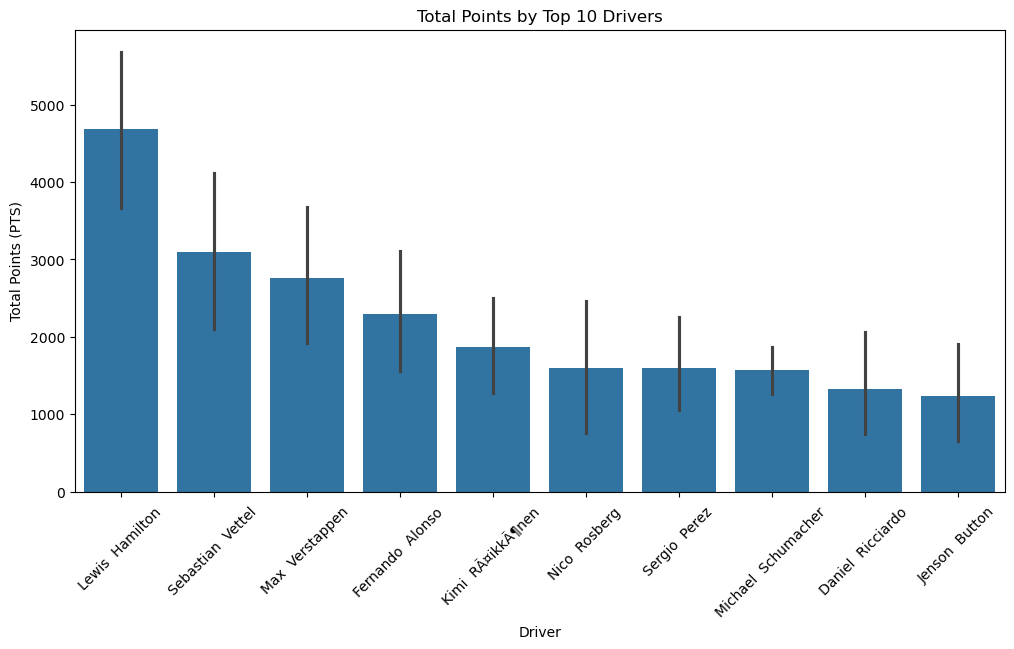

In [63]:
# Group by 'Driver' and calculate the total points for each driver
top_drivers = drivers.groupby('Driver')['PTS'].sum().sort_values(ascending=False).head(10).index

# Filter the dataframe to only include the top 10 drivers
top_drivers_data = drivers[drivers['Driver'].isin(top_drivers)]

# Create a bar plot of total points by the top 10 drivers
plt.figure(figsize=(12, 6))
sns.barplot(x='Driver', y='PTS', data=top_drivers_data, estimator=sum, order=top_drivers)
plt.title('Total Points by Top 10 Drivers')
plt.xlabel('Driver')
plt.ylabel('Total Points (PTS)')
plt.xticks(rotation=45)
plt.show()

In [68]:
# Lewis Hamilton has the most points over the years, but he has also been racing longer than Max Verstappen and Daniel Ricciardo for example. Would be interesting to see a projection of Max's poiints after racing as long as Hamilton.

In [69]:
# create chart showing top nationalities based on points

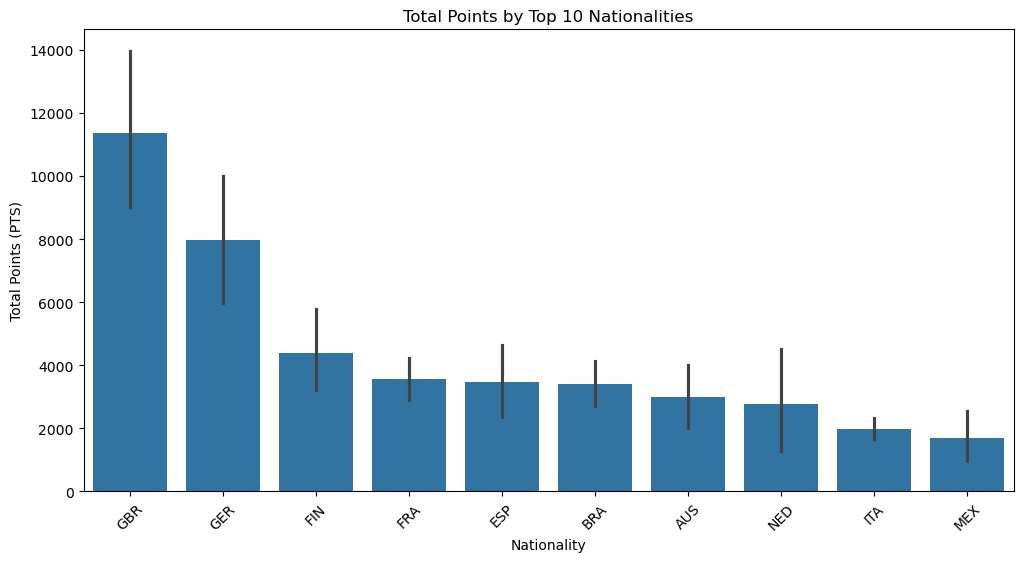

In [64]:
# Group by 'Nationality' and calculate the total points for each nationality
top_nationalities = drivers.groupby('Nationality')['PTS'].sum().sort_values(ascending=False).head(10).index

# Filter the dataframe to only include the top 10 nationalities
top_nationalities_data = drivers[drivers['Nationality'].isin(top_nationalities)]

# Create a bar plot of total points by the top 10 nationalities
plt.figure(figsize=(12, 6))
sns.barplot(x='Nationality', y='PTS', data=top_nationalities_data, estimator=sum, order=top_nationalities)
plt.title('Total Points by Top 10 Nationalities')
plt.xlabel('Nationality')
plt.ylabel('Total Points (PTS)')
plt.xticks(rotation=45)
plt.show()

In [70]:
# Great Britain is on top. This answers one of the questions I had which was to see which driver nationalities are the highest performers.

# Potential hypotheses - 
## 1. The success of a driver in accumulating points is highly dependent on the car manufacturer they drive for, indicating that the performance of a driver is not only a function of their skill but also the quality of the team and car.
## 2. Drivers are more likely to perform well (i.e., finish in top positions) when racing in their home country, leading to higher points accumulation in these races.
## 3. Changes in the Formula 1 points system over the years have led to an increase in the total points accumulated by drivers and teams.
## 4. Drivers and teams from wealthier nations or teams with more financial backing are more likely to accumulate higher points totals due to better access to resources, technology, and talent.

In [75]:
# export cleaned df's (dropped unnamed category)

drivers.to_csv(os.path.join(path, 'Data After Assignment 6.2', 'drivers2.csv'))

In [76]:
winners.to_csv(os.path.join(path, 'Data After Assignment 6.2', 'winners2.csv'))

In [77]:
teams.to_csv(os.path.join(path, 'Data After Assignment 6.2', 'teams2.csv'))

In [78]:
laps.to_csv(os.path.join(path, 'Data After Assignment 6.2', 'laps2.csv'))